array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11859ea90>,
      dtype=object)

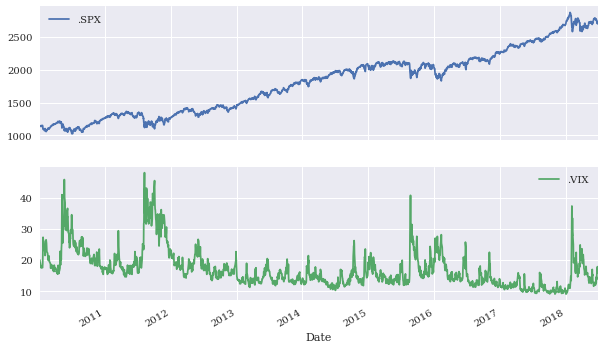

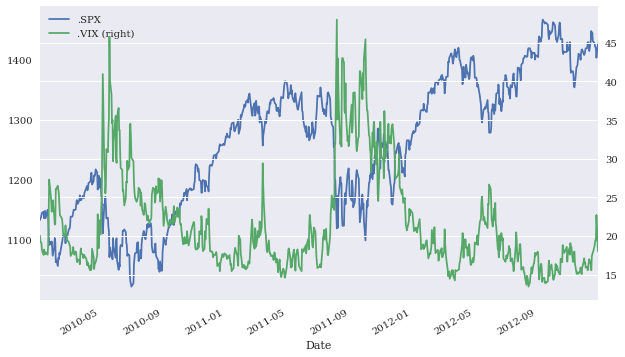

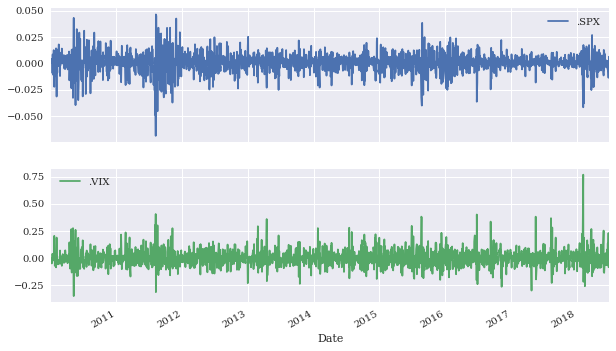

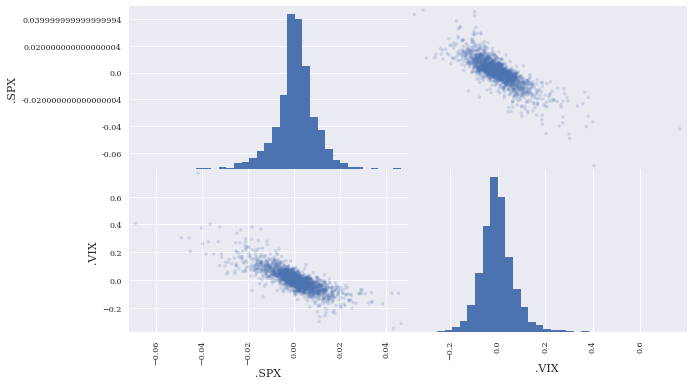

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pylab
from pylab import plt, mpl  
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
raw = pd.read_csv('../Data/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
eod_data = raw[['.SPX', '.VIX']].dropna()
eod_data.plot(subplots=True, figsize=(10,6));
eod_data.loc[:'2012-12-31'].plot(figsize=(10,6), secondary_y='.VIX')
rets = np.log(eod_data/eod_data.shift(1))
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10,6))
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins':35}, figsize=(10,6))